In [7]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.stem import SnowballStemmer
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('gutenberg')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

# 1. (12 pts) Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.htmlLinks to an external site. 

* Stem or lemmatize the words and find counts.

* Select the top 20 words and create a bar chart.

* Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list of top words, alter your logic to exclude them.

* Specify why you chose stemming or lemmatization.

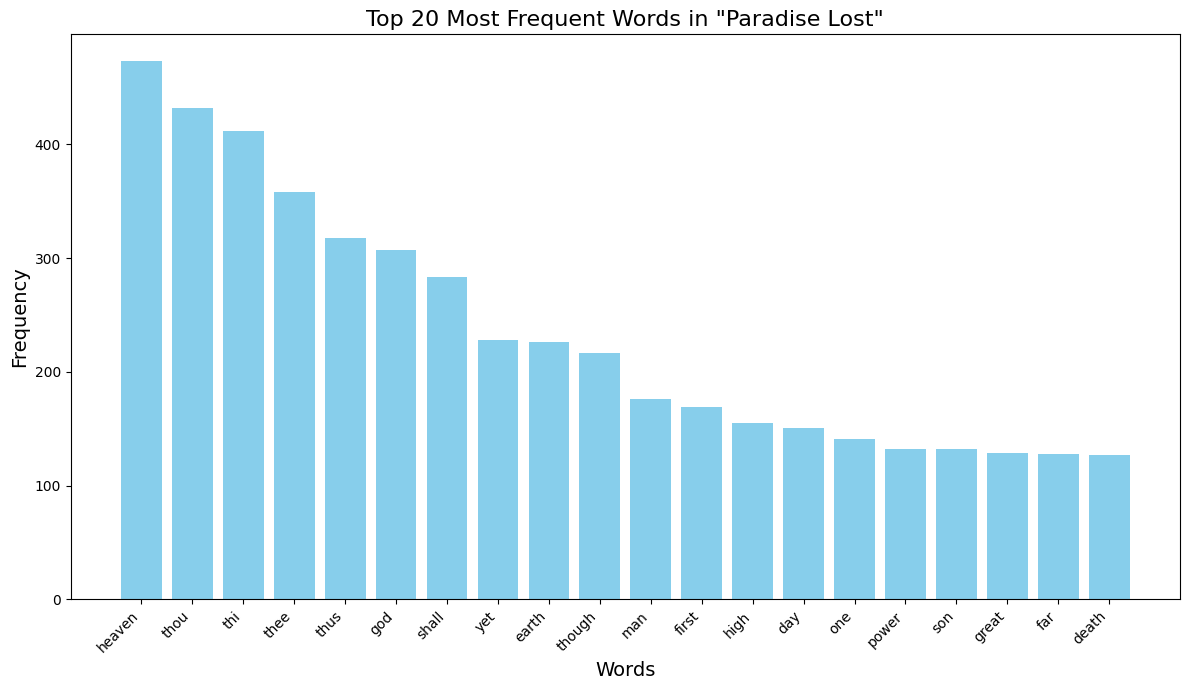

Top 20 Most Frequent Words: [('heaven', 473), ('thou', 432), ('thi', 412), ('thee', 358), ('thus', 318), ('god', 307), ('shall', 283), ('yet', 228), ('earth', 226), ('though', 217), ('man', 176), ('first', 169), ('high', 155), ('day', 151), ('one', 141), ('power', 132), ('son', 132), ('great', 129), ('far', 128), ('death', 127)]


In [8]:
def load_paradise_lost():
    
    return gutenberg.raw('milton-paradise.txt')

def tokenize_and_clean(text):

    tokens = nltk.word_tokenize(text)

    stemmer = SnowballStemmer('english')

    stop_words = set(stopwords.words('english'))

    cleaned_tokens = []

    for token in tokens:

        token_lower = token.lower()

        if token_lower.isalpha() and token_lower not in stop_words and len(token_lower) > 2:

            stemmed_token = stemmer.stem(token_lower)

            cleaned_tokens.append(stemmed_token)

    return cleaned_tokens

def get_word_frequencies(tokens):

    return Counter(tokens)

def plot_top_words(frequency, n=20):

    most_common_words = frequency.most_common(n)

    words, counts = zip(*most_common_words)

    plt.figure(figsize=(12, 7))

    plt.bar(words, counts, color='skyblue')

    plt.xlabel('Words', fontsize=14)

    plt.ylabel('Frequency', fontsize=14)

    plt.title(f'Top {n} Most Frequent Words in "Paradise Lost"', fontsize=16)

    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    plt.show()

    return most_common_words

def main():

    text = load_paradise_lost()

    cleaned_tokens = tokenize_and_clean(text)

    frequency = get_word_frequencies(cleaned_tokens)

    top_twenty = plot_top_words(frequency, n=20)

    print("Top 20 Most Frequent Words:", top_twenty)

if __name__ == "__main__":

    main()

**Stemming was used in this situation because it effectively reduces words to their root forms which essentially groups similar words together (e.g., "running" and "runner" become "run"). This simplification is adequate for frequency counts and helps in identifying the more common themes or subjects in the text.**

# 2. (10 pts) Perform Vader Sentiment Analysis on the book.

* Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.html links to an external site. This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.

In [9]:
def extract_sentences(text):

    sentences = nltk.sent_tokenize(text)

    return sentences

def analyze_sentiments(sentences, analyzer):

    sentence_scores = []

    for sentence in sentences:

        scores = analyzer.polarity_scores(sentence)

        compound_score = scores['compound']

        sentence_scores.append((sentence, compound_score))

    return sentence_scores

def sort_by_compound_desc(item):

    return -item[1]

def sort_by_compound_asc(item):

    return item[1]

def sort_by_neutral_score(item):

    return abs(item[1])

def get_top_sentences(sentence_scores, top_n=5):

    positive_sentences = sorted(sentence_scores, key=sort_by_compound_desc)[:top_n]

    negative_sentences = sorted(sentence_scores, key=sort_by_compound_asc)[:top_n]

    neutral_sentences = sorted(sentence_scores, key=sort_by_neutral_score)[:top_n]

    return positive_sentences, negative_sentences, neutral_sentences

def display_top_sentences(positive_sentences, negative_sentences, neutral_sentences):

    print("Top 5 Positive Sentences:")

    for sentence, score in positive_sentences:

        print(f"• {sentence} (Compound Score: {score})")

    print("\nTop 5 Negative Sentences:")

    for sentence, score in negative_sentences:

        print(f"• {sentence} (Compound Score: {score})")

    print("\nTop 5 Neutral Sentences:")

    for sentence, score in neutral_sentences:

        print(f"• {sentence} (Compound Score: {score})")

def main():

    text = load_paradise_lost()

    sentences = extract_sentences(text)

    sia = SentimentIntensityAnalyzer()

    sentence_scores = analyze_sentiments(sentences, sia)

    positive_sentences, negative_sentences, neutral_sentences = get_top_sentences(sentence_scores)

    display_top_sentences(positive_sentences, negative_sentences, neutral_sentences)

if __name__ == "__main__":
    
    main()

Top 5 Positive Sentences:
• Beneath him with new wonder now he views, 
To all delight of human sense exposed, 
In narrow room, Nature's whole wealth, yea more, 
A Heaven on Earth:  For blissful Paradise 
Of God the garden was, by him in the east 
Of Eden planted; Eden stretched her line 
From Auran eastward to the royal towers 
Of great Seleucia, built by Grecian kings, 
Of where the sons of Eden long before 
Dwelt in Telassar:  In this pleasant soil 
His far more pleasant garden God ordained; 
Out of the fertile ground he caused to grow 
All trees of noblest kind for sight, smell, taste; 
And all amid them stood the tree of life, 
High eminent, blooming ambrosial fruit 
Of vegetable gold; and next to life, 
Our death, the tree of knowledge, grew fast by, 
Knowledge of good bought dear by knowing ill. 
Southward through Eden went a river large, 
Nor changed his course, but through the shaggy hill 
Passed underneath ingulfed; for God had thrown 
That mountain as his garden-mould high ra

# 3. (3 pts) Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.

**When I ran "Paradise Lost" through the Vader Sentiment Analyzer, the results mostly lined up with what the book is about. The happiest sentences were full of gorgeous descriptions of Paradise, using words that really show joy and amazement. On the other hand, the saddest parts dealt with sin, hopelessness, and what happened after the Fall, which are central to the story.**


**But honestly, I don't think the scores are always accurate because Milton's writing is super complex. He uses old-timey words, complicated sentences, and a bunch of poetic tricks that Vader probably has a hard time picking up on. Since Vader is made for modern language, it might miss some of the deeper feelings in this 17th-century work. So, while the sentiment scores give a rough idea of the emotions in the text, they don't always capture what Milton was really trying to express.**

# Extra credit (3 pts): create a word cloud for your results from question 1 (see chapter 21 in your book for how to do this)

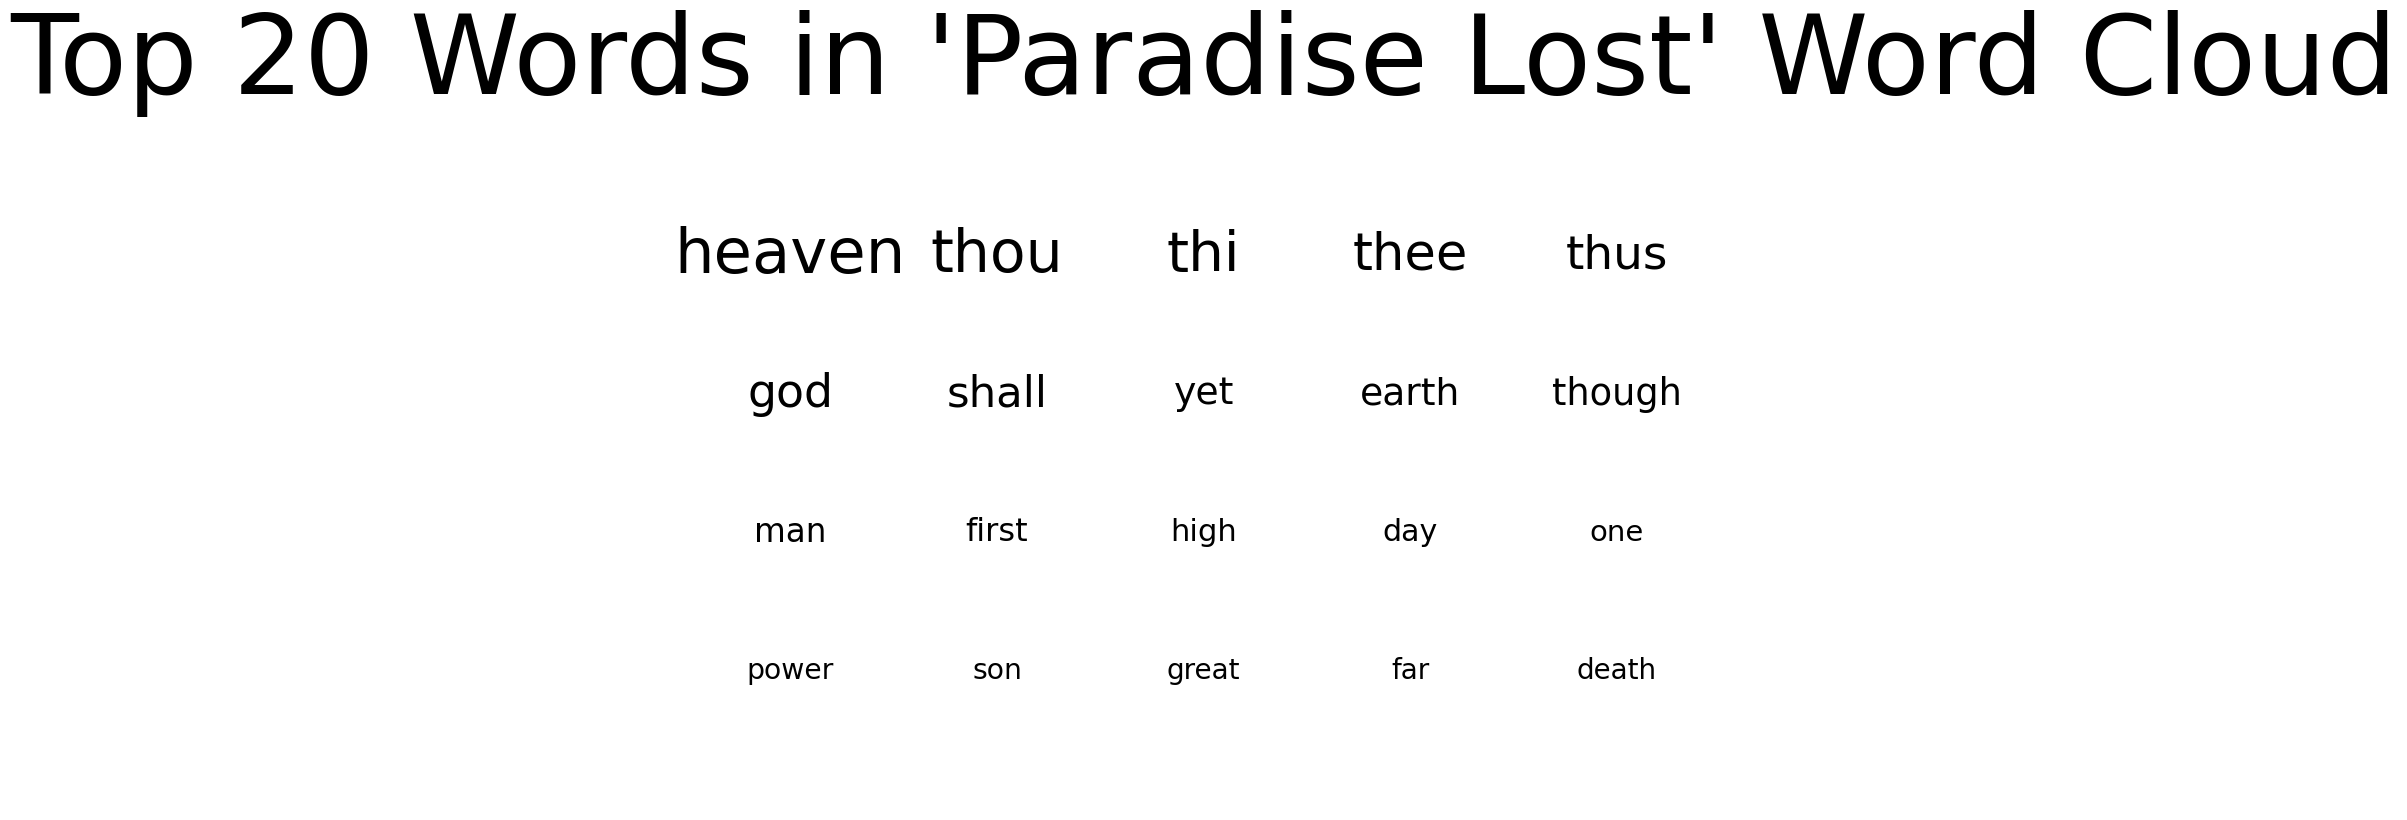

In [10]:
def compute_font_size(frequency, min_freq, max_freq):

    min_size = 20

    max_size = 45

    size = min_size + (frequency - min_freq) / (max_freq - min_freq) * (max_size - min_size)

    return size

def generate_positions(num_terms):

    positions = []

    rows = 4

    cols = 5

    x_spacing = 100 / (cols + 1)

    y_spacing = 100 / (rows + 1)

    for i in range(num_terms):

        col = i % cols

        row = i // cols

        x = (col + 1) * x_spacing

        y = 100 - (row + 1) * y_spacing

        positions.append((x, y))

    return positions

def plot_word_cloud(common_terms):

    frequencies = [freq for term, freq in common_terms]

    min_freq = min(frequencies)

    max_freq = max(frequencies)

    positions = generate_positions(len(common_terms))

    plt.figure(figsize=(16, 9))

    for i in range(len(common_terms)):

        term, frequency = common_terms[i]

        x_pos, y_pos = positions[i]

        font_size = compute_font_size(frequency, min_freq, max_freq)

        plt.text(

            x_pos,

            y_pos,

            term,

            fontsize=font_size,

            ha='center',

            va='center'

        )

    plt.xlim(0, 100)

    plt.ylim(0, 100)

    plt.axis('off')

    plt.title("Top 20 Words in 'Paradise Lost' Word Cloud", fontsize=80)

    plt.show()

def main():

    common_terms = [

        ('heaven', 473), ('thou', 432), ('thi', 412), ('thee', 358), ('thus', 318),

        ('god', 307), ('shall', 283), ('yet', 228), ('earth', 226), ('though', 217),

        ('man', 176), ('first', 169), ('high', 155), ('day', 151), ('one', 141),

        ('power', 132), ('son', 132), ('great', 129), ('far', 128), ('death', 127)

    ]

    plot_word_cloud(common_terms)

if __name__ == "__main__":

    main()